In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Read data file using Pandas  
pima_df=pd.read_csv('diabetes.csv')

In [3]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(pima_df.shape)

(768, 9)


In [5]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'Null value Occurance accross the Features')

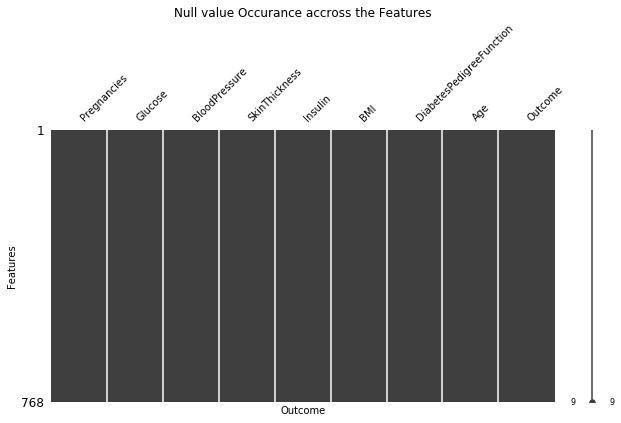

In [6]:
# Plot the occurence null values across feature 
msno.matrix(pima_df,  figsize=(10,5), fontsize=10);
plt.xlabel('Outcome')
plt.ylabel('Features')
plt.title('Null value Occurance accross the Features')

In [7]:
pima_df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB4F7D4208>,
      dtype=object)

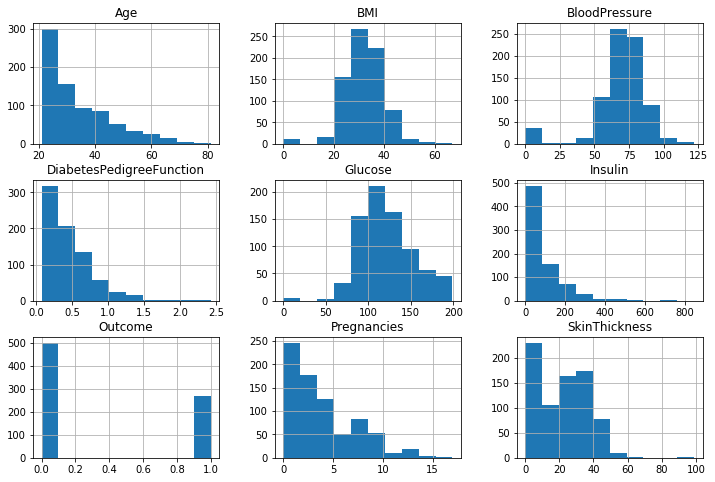

In [8]:
pima_df.hist(figsize=(12,8))

Text(0.5, 1, 'Correlation in Feature Set')

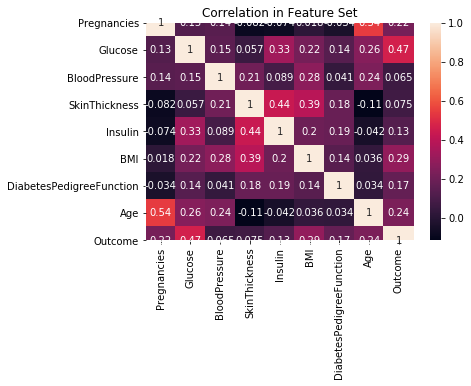

In [9]:
corr = pima_df.corr()
sns.heatmap(corr, annot = True)
plt.title('Correlation in Feature Set')

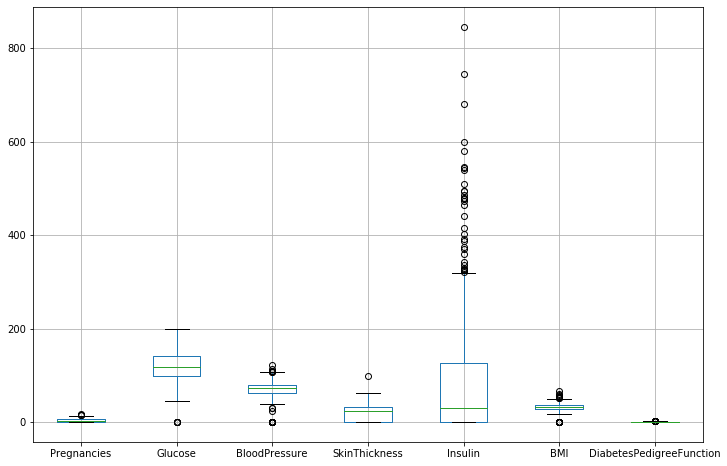

In [10]:
# Lets look at the Outliers in the feature space 
pima_df.boxplot(column=['Pregnancies', 'Glucose','BloodPressure' ,'SkinThickness' ,'Insulin', 
                         'BMI', 'DiabetesPedigreeFunction'], figsize=(12,8))
plt.show()

In [11]:
# Copy the dataframe
df1 = pima_df.copy()

# Remove numerical outliers by quantile
for col in df1:
    if df1[col].dtype == 'int64' or df1[col].dtype == 'float64':
        
      # Set quantile limits and replacement mean
      upper_limit = df1[col].quantile(.90)
      lower_limit = df1[col].quantile(.10)
      mean = df1[col].mean()
    
      # replace outliers
      for index,value in enumerate(df1[col]):
        if value > upper_limit: df1.loc[index,col] = mean
        if value < lower_limit: df1.loc[index,col] = mean

# View the dataframe
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.000000,72.000000,35.000000,0.0,33.600000,0.627000,50.000000,1
1,1.000000,85.000000,66.000000,29.000000,0.0,26.600000,0.351000,31.000000,0
2,8.000000,120.894531,64.000000,0.000000,0.0,31.992578,0.672000,32.000000,1
3,1.000000,89.000000,66.000000,23.000000,94.0,28.100000,0.167000,33.240885,0
4,0.000000,137.000000,69.105469,35.000000,168.0,31.992578,0.471876,33.000000,1
...,...,...,...,...,...,...,...,...,...
763,3.845052,101.000000,76.000000,20.536458,180.0,32.900000,0.171000,33.240885,0
764,2.000000,122.000000,70.000000,27.000000,0.0,36.800000,0.340000,27.000000,0
765,5.000000,121.000000,72.000000,23.000000,112.0,26.200000,0.245000,30.000000,0
766,1.000000,126.000000,60.000000,0.000000,0.0,30.100000,0.349000,47.000000,1


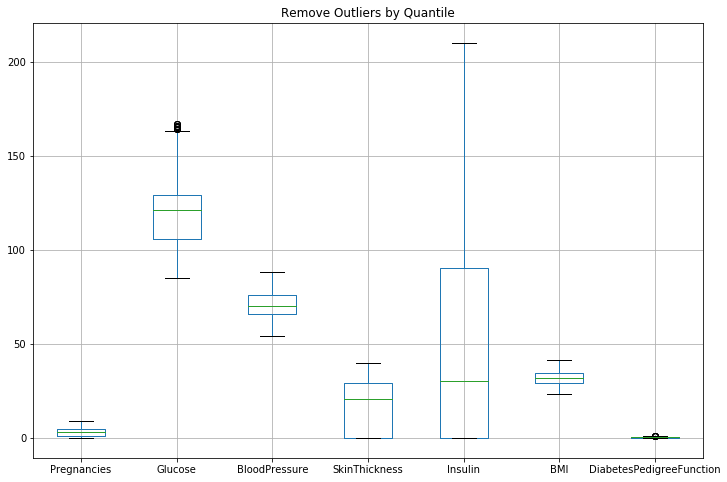

In [12]:
# Lets look at the Outliers after removing Outlier using IQR in the feature space 
df1.boxplot(column=['Pregnancies', 'Glucose','BloodPressure' ,'SkinThickness' ,'Insulin', 
                         'BMI', 'DiabetesPedigreeFunction'], figsize=(12,8))
plt.title('Remove Outliers by Quantile')
plt.show()

In [15]:
# Preapre Data for training and testing the ML model
X_features = pima_df.iloc[:,0:8]
Y_outcome = pima_df.iloc[:,8]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_features,Y_outcome, random_state = 22, test_size = 0.21)

In [21]:
# Import ML models 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [22]:
# Implemented few Baseline models to find best among them. 
# Fit the intial model
clfs = [XGBClassifier(),LGBMClassifier(), 
        ExtraTreesClassifier(),ExtraTreeClassifier(),
        BaggingClassifier(),  DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        AdaBoostClassifier(), RandomForestClassifier()]

In [23]:
models = []
models.append(("XGB", XGBClassifier()))
models.append(("LGBM", LGBMClassifier()))
models.append(("EXT", ExtraTreesClassifier()))
models.append(("EXTree", ExtraTreesClassifier()))
models.append(("BGG", BaggingClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("GB",GradientBoostingClassifier()))
models.append(("ADA",AdaBoostClassifier()))
models.append(("RF", RandomForestClassifier()))

In [24]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

XGB 0.7737978142076501
LGBM 0.7473770491803278
EXT 0.760655737704918
EXTree 0.7770491803278687
BGG 0.7491530054644808
DT 0.71448087431694
GB 0.7704644808743168
ADA 0.7639617486338797
RF 0.7755464480874317


[Text(0, 0, 'XGB'),
 Text(0, 0, 'LGBM'),
 Text(0, 0, 'EXT'),
 Text(0, 0, 'EXTree'),
 Text(0, 0, 'BGG'),
 Text(0, 0, 'DT'),
 Text(0, 0, 'GB'),
 Text(0, 0, 'ADA'),
 Text(0, 0, 'RF')]

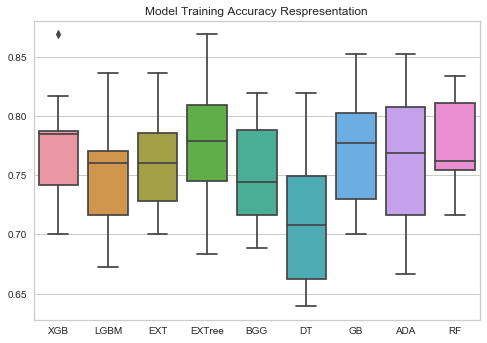

In [34]:
plt.title('Model Training Accuracy Respresentation')
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)

In [26]:
# GradientBoostingClassifier is opted for further model imporvement 
gb_model =GradientBoostingClassifier()
# Set up parameter grid
grid = {'learning_rate':np.arange(0.1,1.0,0.2),
        'n_estimators':np.arange(0,100, 25)[1:],
        'max_depth':list(range(2,30,4)),
        'max_features': list(range(2,30,2)),
        'max_leaf_nodes':[5,10,25,50,75,100]}

# Conduct gird search
grid_search = GridSearchCV(estimator=gb_model, param_grid=grid, 
                     scoring='accuracy', n_jobs=-1, refit=True, cv=10,
                     return_train_score=True)
# Fit model
grid_search.fit(X_train, Y_train);

print('Accuracy of best parameters: %.5f'%grid_search.best_score_)
print('Best parameters: %s' %grid_search.best_params_)

Accuracy of best parameters: 0.78699
Best parameters: {'learning_rate': 0.1, 'max_depth': 14, 'max_features': 6, 'max_leaf_nodes': 10, 'n_estimators': 25}


In [27]:
# Fit the final model
gd_model = GradientBoostingClassifier(learning_rate = 0.1, 
                                      max_depth=14, max_features=6, 
                                      max_leaf_nodes=10, n_estimators=25)
gd_model.fit(X_train, Y_train)

# View the cross validation score of the intial model
scores = cross_val_score(gb_model, X_train, Y_train, cv=10,
               scoring='accuracy')
print(f'Cross Validation Score: {scores.mean():.5f}')

Cross Validation Score: 0.76883


In [28]:
# Predict the results from our test data
from sklearn.metrics import classification_report
pd.Series(gd_model.predict(X_test)).head(n=9)
Y_pred = gd_model.predict(X_test)
print("Classification Report: \n {}".format (classification_report(Y_test,Y_pred)))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.91      0.83       105
           1       0.74      0.46      0.57        57

    accuracy                           0.75       162
   macro avg       0.75      0.69      0.70       162
weighted avg       0.75      0.75      0.74       162



From it's offical website, yellowbrick defined itself as "a suite of visual diagnostic tools called “Visualizers” that extend the Scikit-Learn API to allow human steering of the model selection process". 
Basically, it depends on scikit-learn and matplotlib.

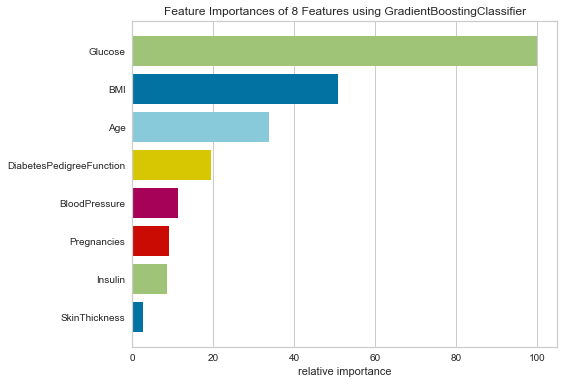

In [29]:
# Print the most important features
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(gd_model)
viz.fit(X_train, Y_train)
viz.show()

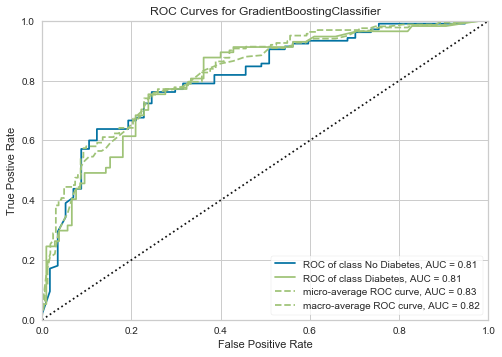

In [30]:
#The Receiver Operating Characteristic (ROC) is a measure of a classifier’s predictive quality that 
#compares and visualizes the tradeoff between the model’s sensitivity and specificity.
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(gd_model, classes=["No Diabetes", "Diabetes"])
visualizer.fit(X_train, Y_train)        
visualizer.score(X_test, Y_test)       
visualizer.show()

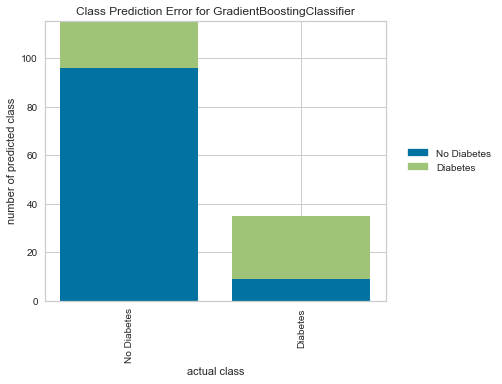

In [31]:
from yellowbrick.classifier import ClassPredictionError
# Instantiate the classification model and visualizer
classes = ['No Diabetes', 'Diabetes']
visualizer = ClassPredictionError(gd_model, classes=classes)

# Fit the training data to the visualizer
visualizer.fit(X_train, Y_train)

# Evaluate the model on the test data
visualizer.score(X_test, Y_test)

# Draw visualization
visualizer.show()

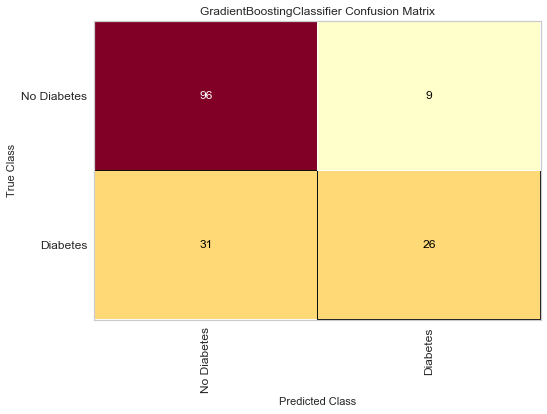

In [32]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(gd_model, classes=classes)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)
cm.show()

In [33]:
# Lastly Save the model for futher use
from sklearn.externals import joblib  
joblib.dump(gd_model, 'pima.pkl')

['pima.pkl']